In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

In [2]:
data = pd.read_csv("Wholesale-customers-data.csv")

In [3]:
data.shape

(440, 8)

In [4]:
data.head(6)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
5,2,3,9413,8259,5126,666,1795,1451


In [5]:
pd.get_dummies(data['Channel'],prefix='channel')

,channel_1,channel_2
0,0,1
1,0,1
2,0,1
3,1,0
4,0,1
...,...,...
435,1,0
436,1,0
437,0,1
438,1,0


In [6]:
pd.get_dummies(data['Region'],prefix='region')

,region_1,region_2,region_3
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
435,0,0,1
436,0,0,1
437,0,0,1
438,0,0,1


In [7]:
df = pd.concat([data,pd.get_dummies(data['Region'],prefix='region')],axis=1)

In [8]:
df.shape

(440, 11)

In [9]:
df = pd.concat([df,pd.get_dummies(df['Channel'],prefix='channel')],axis=1)

In [10]:
df.shape

(440, 13)

In [11]:
df.head(4)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,region_1,region_2,region_3,channel_1,channel_2
0,2,3,12669,9656,7561,214,2674,1338,0,0,1,0,1
1,2,3,7057,9810,9568,1762,3293,1776,0,0,1,0,1
2,2,3,6353,8808,7684,2405,3516,7844,0,0,1,0,1
3,1,3,13265,1196,4221,6404,507,1788,0,0,1,1,0


In [12]:
df.drop(['Channel'],axis=1, inplace=True)

In [13]:
df.drop(['Region'],axis=1, inplace=True)

In [14]:
df.shape


(440, 11)

In [15]:
df.head(5)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,region_1,region_2,region_3,channel_1,channel_2
0,12669,9656,7561,214,2674,1338,0,0,1,0,1
1,7057,9810,9568,1762,3293,1776,0,0,1,0,1
2,6353,8808,7684,2405,3516,7844,0,0,1,0,1
3,13265,1196,4221,6404,507,1788,0,0,1,1,0
4,22615,5410,7198,3915,1777,5185,0,0,1,0,1


In [16]:
df.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,region_1,region_2,region_3,channel_1,channel_2
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.0000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455,0.1750,0.106818,0.718182,0.677273,0.322727
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937,0.3804,0.309234,0.450397,0.468052,0.468052
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000,0.0000,0.000000,0.000000,0.000000,0.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000,0.0000,0.000000,0.000000,0.000000,0.000000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000,0.0000,0.000000,1.000000,1.000000,0.000000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000,0.0000,0.000000,1.000000,1.000000,1.000000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000,1.0000,1.000000,1.000000,1.000000,1.000000


# K-means

In [17]:
scaler = preprocessing.StandardScaler().fit(df)
dfNorm = scaler.transform(df)

In [18]:
maxClusters = 30
sse = []
for nClusters in range(2,maxClusters):
    kmeans = KMeans(n_clusters=nClusters, random_state=0).fit(dfNorm)
    sse.append(kmeans.inertia_)

In [19]:
print(sse)

[3486.5662999315227, 2912.765028066113, 2488.4055382085585, 2047.35315285573, 1740.422520977574, 1527.872319208096, 1382.386362926113, 1220.0758058479323, 1093.8354120645513, 1001.337669577103, 915.2008451846101, 864.1607164776401, 802.5281175416098, 768.2789602556318, 717.4886613372867, 692.4693585071383, 651.0978631421946, 611.1135217653642, 590.537110675925, 565.0234602089093, 548.8640882011797, 523.4495801906328, 502.5526601950243, 479.06816986229614, 464.6252332176614, 446.0766267263181, 434.354092757626, 408.5391789533048]


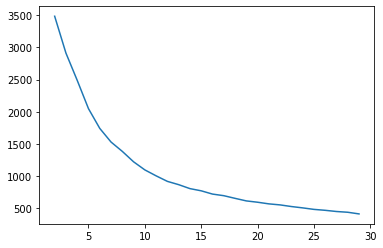

In [20]:
plt.plot(range(2,maxClusters),sse)

In [21]:
silh = []
for nClusters in range(2,maxClusters):
    kmeans = KMeans(n_clusters=nClusters, random_state=0).fit(dfNorm)
    silhouette_avg = silhouette_score(dfNorm, kmeans.labels_)
    silh.append(silhouette_avg)

In [22]:
print(silh)

[0.3822985274279436, 0.38859224737957687, 0.4429856721572508, 0.4702148998344798, 0.47931423915908716, 0.48517954752789827, 0.47415785178924047, 0.49983180989940923, 0.4535033485783653, 0.4652638633000646, 0.4376073958219695, 0.3983334192941716, 0.4366792836205926, 0.4279473885037735, 0.42979715724410333, 0.3903617056869452, 0.3481626302220642, 0.3306741109859309, 0.29508040243552797, 0.382211381629064, 0.32300196326483116, 0.3156122522249594, 0.3647919044893867, 0.31972877409097816, 0.29705456901061567, 0.29518182474056004, 0.3094053880074618, 0.30869883235761597]


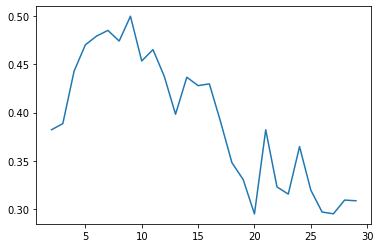

In [23]:
plt.plot(range(2,maxClusters),silh)

In [24]:
kmeans = KMeans(n_clusters=9, random_state=0).fit(dfNorm)

In [25]:
data = pd.concat([df,pd.DataFrame(kmeans.labels_,columns=["Cluster"])],axis=1)

In [26]:
data.head(5)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,region_1,region_2,region_3,channel_1,channel_2,Cluster
0,12669,9656,7561,214,2674,1338,0,0,1,0,1,2
1,7057,9810,9568,1762,3293,1776,0,0,1,0,1,2
2,6353,8808,7684,2405,3516,7844,0,0,1,0,1,2
3,13265,1196,4221,6404,507,1788,0,0,1,1,0,0
4,22615,5410,7198,3915,1777,5185,0,0,1,0,1,2


In [27]:
data['Cluster'].value_counts()

0    171
2     98
1     59
3     40
4     27
7     18
8     17
5      9
6      1
Name: Cluster, dtype: int64

In [28]:
data.groupby('Cluster').mean()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,region_1,region_2,region_3,channel_1,channel_2
Cluster,,,,,,,,,,,
0,9068.842105,2989.432749,3448.959064,2201.099415,772.725146,1000.970760,0.000000,0.000000,1.000000,1.0,0.0
1,12902.254237,3870.203390,4026.135593,3127.322034,950.525424,1197.152542,1.000000,0.000000,0.000000,1.0,0.0
2,9178.336735,8799.591837,13575.091837,1428.091837,5630.346939,1750.306122,0.000000,0.000000,1.000000,0.0,1.0
3,34334.175000,4934.850000,5594.625000,10488.825000,872.175000,2671.450000,0.000000,0.025000,0.975000,1.0,0.0
4,10870.296296,1767.962963,4053.629630,3703.407407,453.481481,939.111111,0.000000,1.000000,0.000000,1.0,0.0
5,17057.222222,35994.666667,50198.111111,2644.444444,25573.111111,2700.777778,0.111111,0.111111,0.777778,0.0,1.0
6,36847.000000,43950.000000,20170.000000,36534.000000,239.000000,47943.000000,0.000000,0.000000,1.000000,1.0,0.0
7,7218.944444,9424.722222,13494.555556,1618.888889,6760.722222,1240.333333,0.000000,1.000000,0.000000,0.0,1.0
8,4793.000000,9752.117647,17223.588235,2457.529412,7567.352941,1813.235294,1.000000,0.000000,0.000000,0.0,1.0


In [29]:
data[(data['Cluster'] == 0) | (data['Cluster'] == 6)].groupby('Cluster').mean()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,region_1,region_2,region_3,channel_1,channel_2
Cluster,,,,,,,,,,,
0,9068.842105,2989.432749,3448.959064,2201.099415,772.725146,1000.97076,0,0,1,1,0
6,36847.000000,43950.000000,20170.000000,36534.000000,239.000000,47943.00000,0,0,1,1,0


# Agglomerative clustering

In [47]:
clustering = AgglomerativeClustering(linkage="ward").fit(df)

In [49]:
linkage_matrix = linkage(df, 'ward')

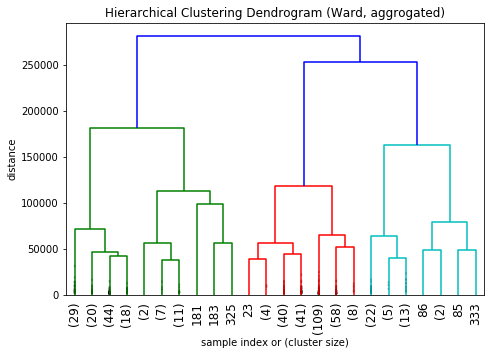

In [55]:
figure = plt.figure(figsize=(7.5, 5))
dendrogram(
    linkage_matrix,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=24,  # show only the last p merged clusters
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.title('Hierarchical Clustering Dendrogram (Ward, aggrogated)')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')
plt.show()